In [1]:
from algorithms import dichotomy_algorithm, golden_ratio_algorithm, fibonacci_algorithm, parabola_algorithm, brent_algorithm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
def build_segments(algo, function, a, b, eps, name):
    ans, calls, segments = algo(function, a, b, eps)
    cur = 0
    x_front = []
    x_back = []
    y_front = []
    y_back = []
    
    for a, b in segments:
        x_front.append(a)
        x_back.append(b)
        y_front.append(cur)
        y_back.append(cur)
        cur += 1
        
    x = x_front + x_back[::-1]
    y = y_front + y_back[::-1]
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_yticks(np.arange(0, max(y), 2))
    ax.set_ylabel("iteration #")
    ax.set_xlabel("segment")
    ax.set_title(name)

In [3]:
def function(x):
    return math.sin(x) * math.pow(x, 3)

a = 3
b = 6
eps = 1e-8

4.5 5.072949016875158 6
5.072949016875158 5.134552702931446 6
5.134552702931446 5.209252383460868 6
5.134552702931446 5.324620905906675 5.324620905906675
5.209252383460868 5.231400217483067 5.324620905906675
5.231400217483067 5.23256047312403 5.324620905906675
5.23256047312403 5.232909702912138 5.324620905906675
5.232909702912138 5.232937528972387 5.246290187101917
5.232937528972387 5.23293838594274 5.246290187101917
5.23293838594274 5.232938451210188 5.246290187101917
5.232938451210188 5.232938452210188 5.234886443223945
5.232938452210188 5.232938512687317 5.232938512687317
5.232938452210188 5.232938461033682 5.232938475310396
5.232938452210188 5.232938456621936 5.232938461033682


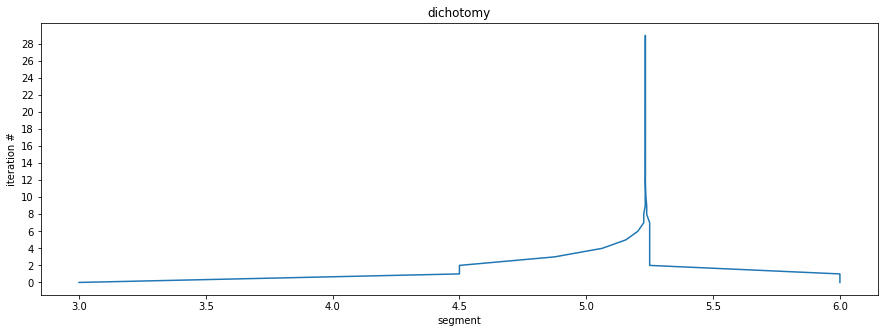

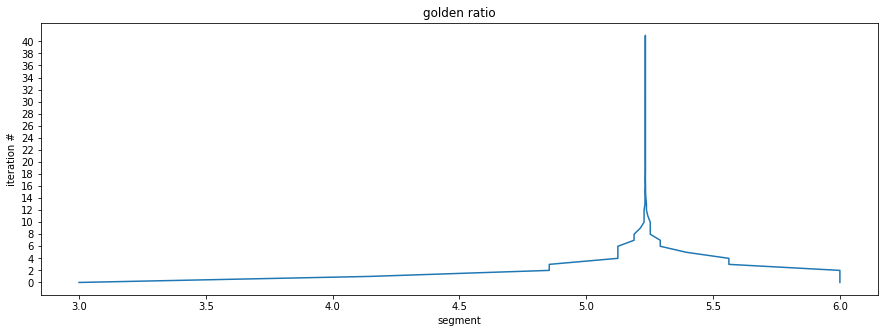

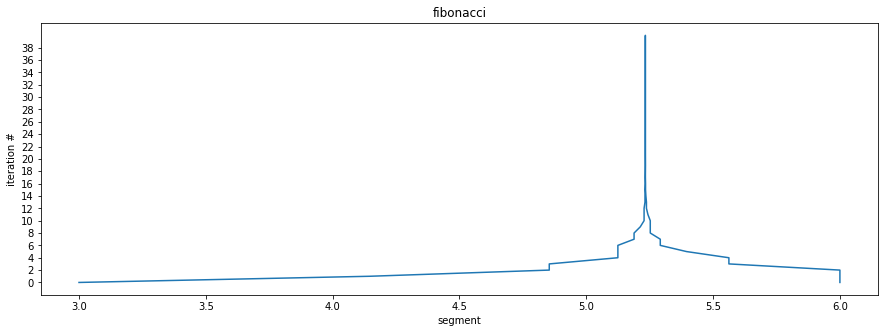

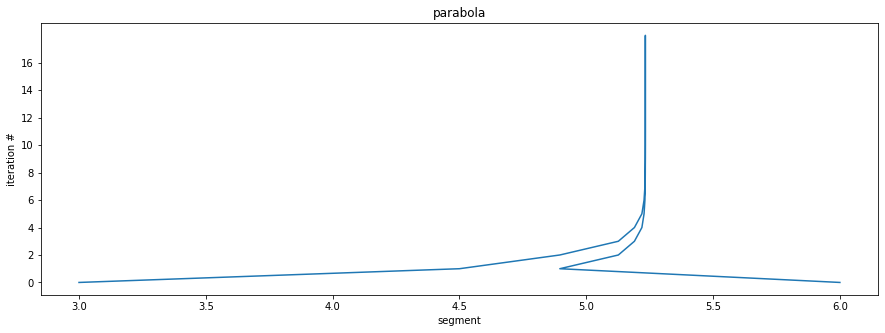

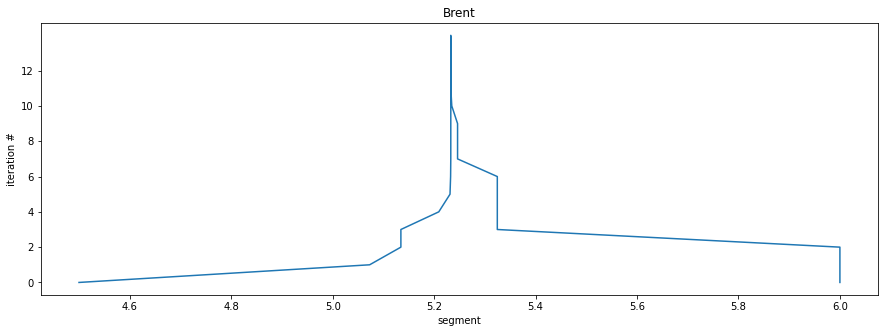

In [4]:
build_segments(dichotomy_algorithm.find_min, function, a, b, eps, "dichotomy")
build_segments(golden_ratio_algorithm.find_min, function, a, b, eps, "golden ratio")
build_segments(fibonacci_algorithm.find_min, function, a, b, eps, "fibonacci")
build_segments(parabola_algorithm.find_min, function, a, b, eps, "parabola")
build_segments(brent_algorithm.find_min, function, a, b, eps, "Brent")

In [5]:
def build_segment_len(algo, function, a, b, eps, name):
    ans, calls, segments = algo(function, a, b, eps)
    cur = 0
    x = []
    y = []
    for a, b in segments:
        x.append(cur)
        y.append(b - a)
        cur += 1
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    ax = fig.add_subplot(111)
    ax.plot(x, y, "r")
    ax.set_xlabel("iteration #")
    ax.set_ylabel("segment length")
    ax.set_title(name)
    
    return x, y

4.5 5.072949016875158 6
5.072949016875158 5.134552702931446 6
5.134552702931446 5.209252383460868 6
5.134552702931446 5.324620905906675 5.324620905906675
5.209252383460868 5.231400217483067 5.324620905906675
5.231400217483067 5.23256047312403 5.324620905906675
5.23256047312403 5.232909702912138 5.324620905906675
5.232909702912138 5.232937528972387 5.246290187101917
5.232937528972387 5.23293838594274 5.246290187101917
5.23293838594274 5.232938451210188 5.246290187101917
5.232938451210188 5.232938452210188 5.234886443223945
5.232938452210188 5.232938512687317 5.232938512687317
5.232938452210188 5.232938461033682 5.232938475310396
5.232938452210188 5.232938456621936 5.232938461033682


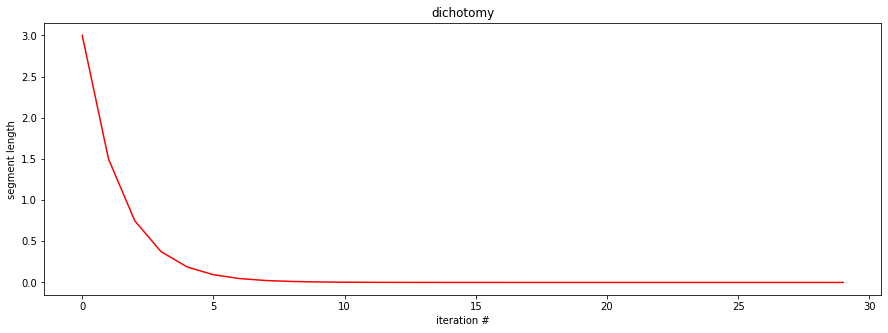

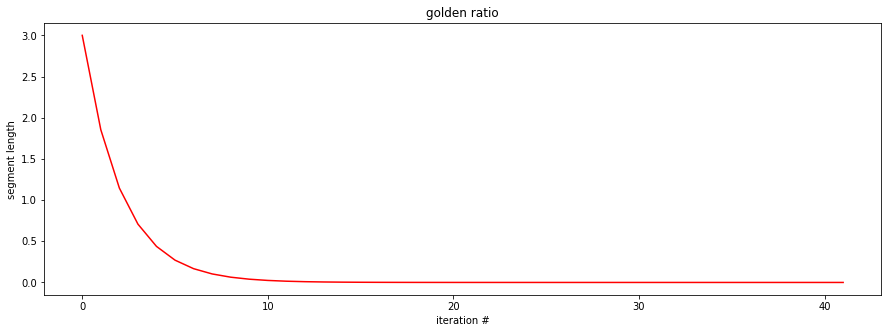

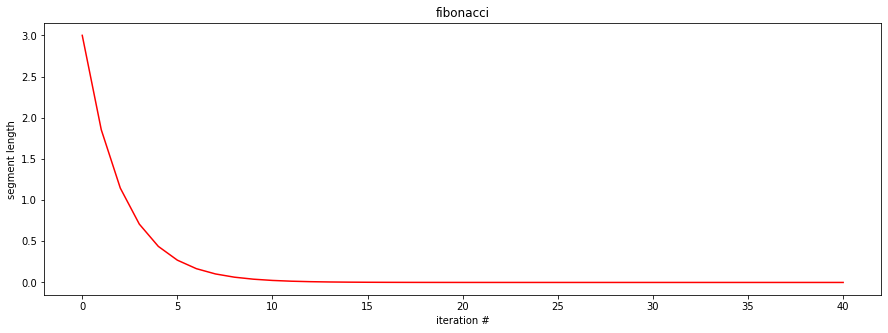

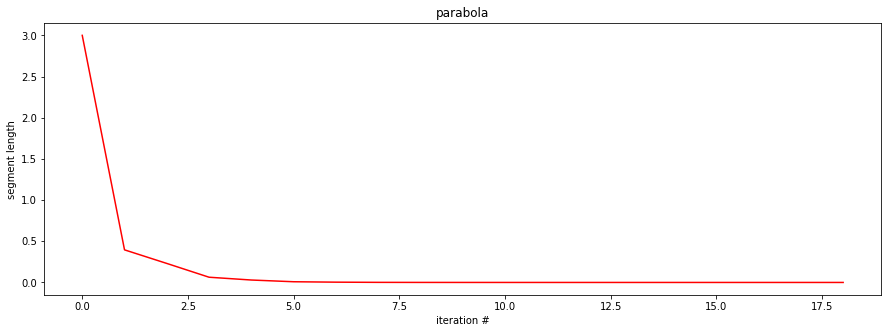

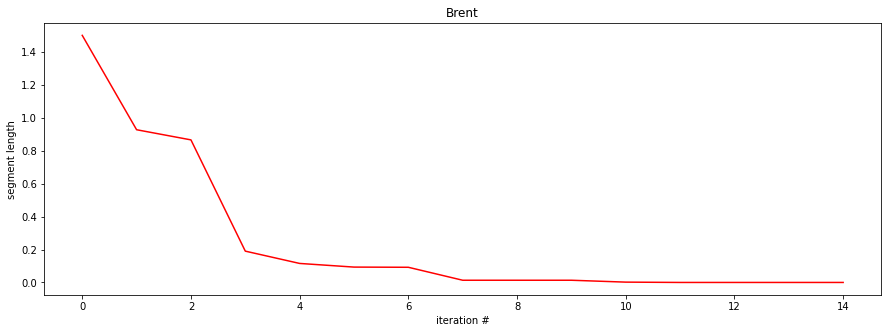

In [6]:
x1, y1 = build_segment_len(dichotomy_algorithm.find_min, function, a, b, eps, "dichotomy")
x2, y2 = build_segment_len(golden_ratio_algorithm.find_min, function, a, b, eps, "golden ratio")
x3, y3 = build_segment_len(fibonacci_algorithm.find_min, function, a, b, eps, "fibonacci")
x4, y4 = build_segment_len(parabola_algorithm.find_min, function, a, b, eps, "parabola")
x5, y5 = build_segment_len(brent_algorithm.find_min, function, a, b, eps, "Brent")

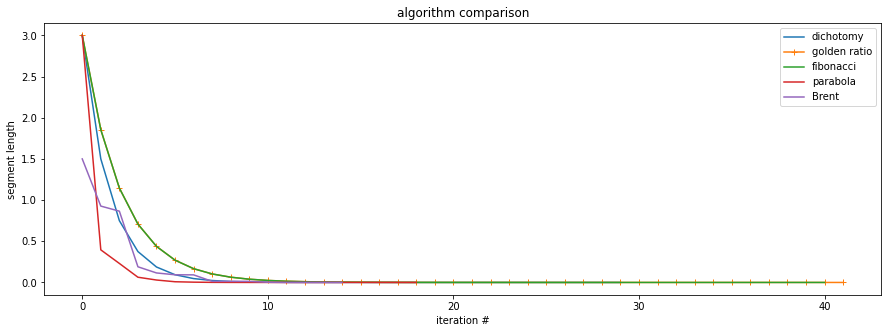

In [7]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax = fig.add_subplot(111)
ax.plot(x1, y1, x2, y2, "-+", x3, y3, x4, y4, x5, y5)
ax.set_xlabel("iteration #")
ax.set_ylabel("segment length")
ax.set_title("algorithm comparison")
ax.legend(["dichotomy", "golden ratio", "fibonacci", "parabola", "Brent"])

In [8]:
def build_epsilon(algo, function, a, b, epsilons, name):
    cur = 0
    x = []
    y_calls = []
    y_iters = []
    for eps in epsilons:
        ans, calls, segments = algo(function, a, b, eps)
        x.append(eps)
        y_iters.append(len(segments))
        y_calls.append(calls)
        
    fig1 = plt.figure()
    fig1.set_figheight(5)
    fig1.set_figwidth(15)
    ax1 = fig1.add_subplot(111)
    ax1.plot(x, y_calls, "g")
    plt.gca().invert_xaxis()
    ax1.set_xscale("log")
    ax1.set_xlabel("epsilon")
    ax1.set_ylabel("calls of function")
    ax1.set_title(name)
    
    fig2 = plt.figure()
    fig2.set_figheight(5)
    fig2.set_figwidth(15)
    ax2 = fig2.add_subplot(111)
    plt.gca().invert_xaxis()
    ax2.plot(x, y_iters, "m")
    ax2.set_xscale("log")
    ax2.set_xlabel("epsilon")
    ax2.set_ylabel("segments")
    ax2.set_title(name)
    
    return x, y_calls, y_iters

4.5 5.072949016875158 6
5.072949016875158 5.134552702931446 6
5.134552702931446 5.209252383460868 6
5.134552702931446 5.324620905906675 5.324620905906675
5.209252383460868 5.231400217483067 5.324620905906675
5.231400217483067 5.241400217483067 5.241400217483067
4.5 5.072949016875158 6
5.072949016875158 5.134552702931446 6
5.134552702931446 5.209252383460868 6
5.134552702931446 5.324620905906675 5.324620905906675
5.209252383460868 5.231400217483067 5.324620905906675
5.231400217483067 5.23256047312403 5.324620905906675
5.23256047312403 5.23356047312403 5.23356047312403
4.5 5.072949016875158 6
5.072949016875158 5.134552702931446 6
5.134552702931446 5.209252383460868 6
5.134552702931446 5.324620905906675 5.324620905906675
5.209252383460868 5.231400217483067 5.324620905906675
5.231400217483067 5.23256047312403 5.324620905906675
5.23256047312403 5.232909702912138 5.324620905906675
5.23256047312403 5.233009702912137 5.233009702912137
4.5 5.072949016875158 6
5.072949016875158 5.134552702931446

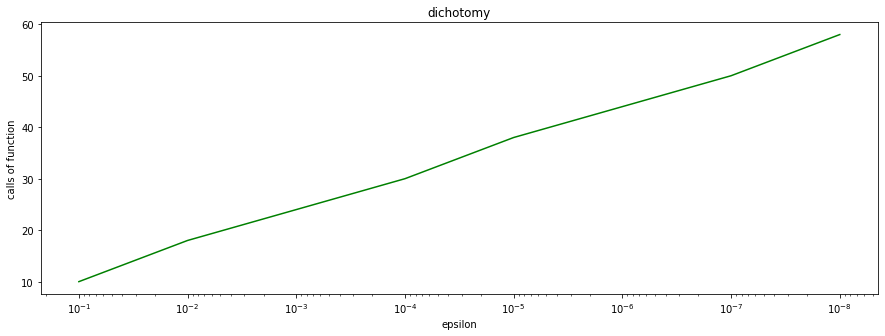

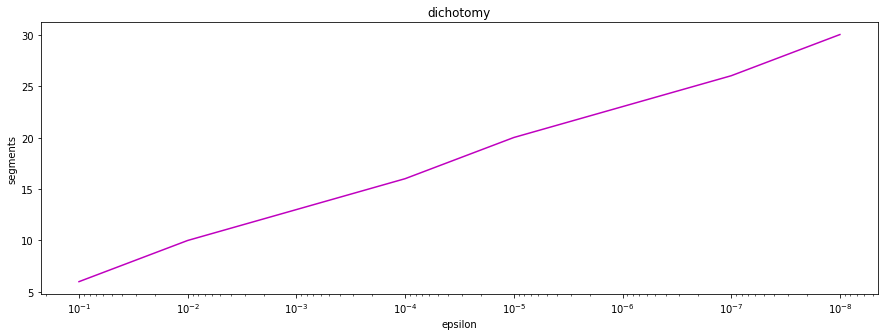

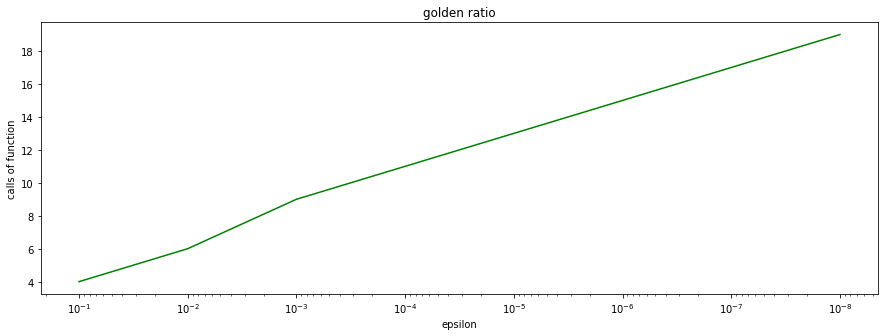

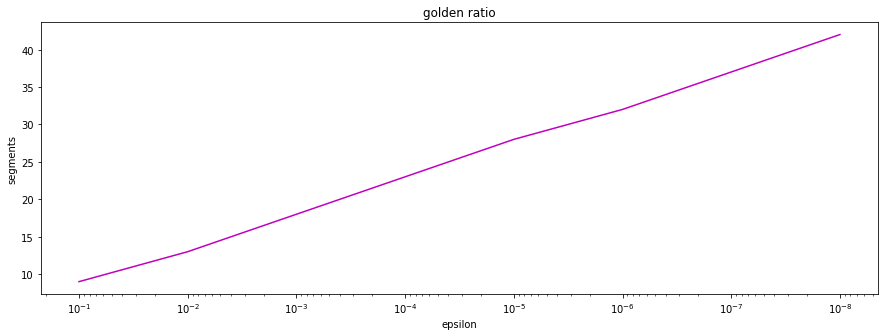

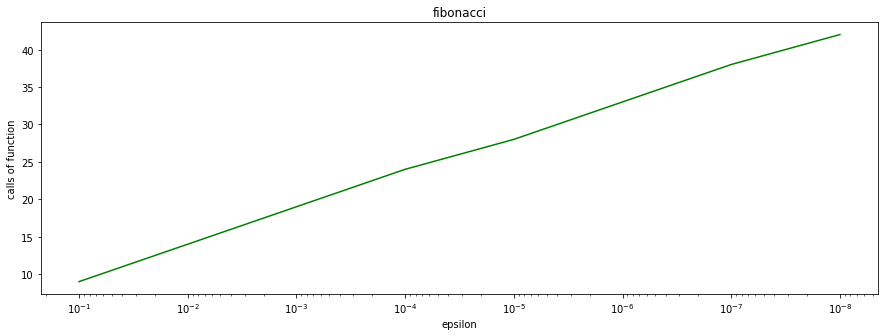

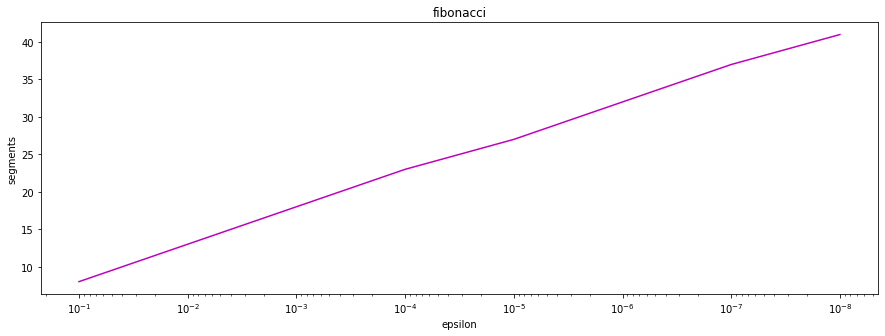

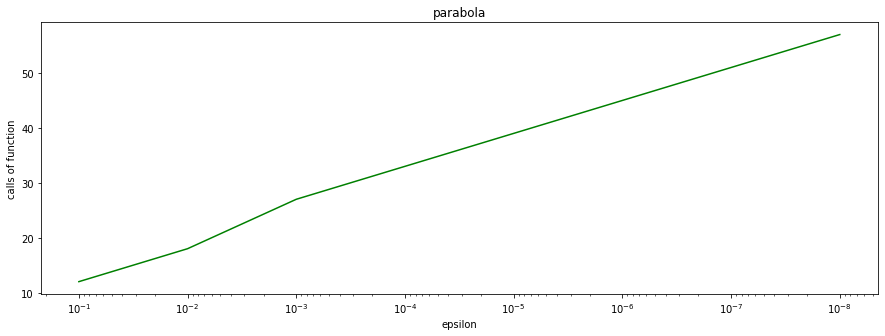

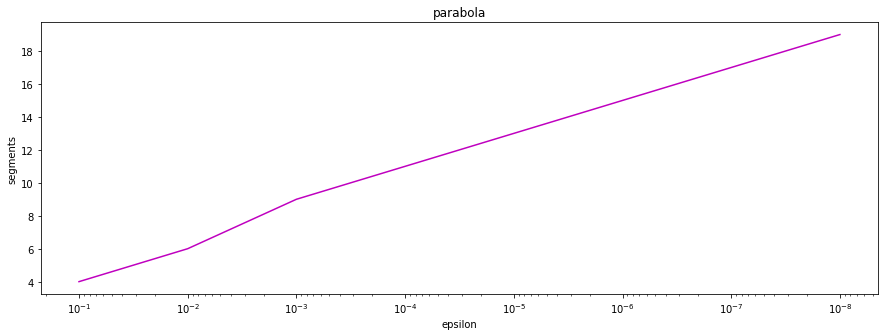

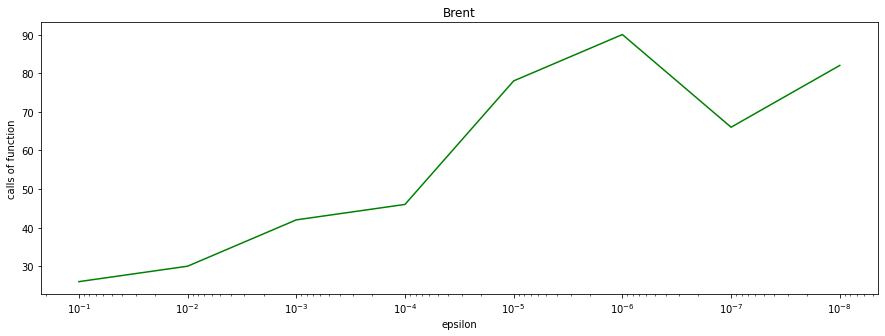

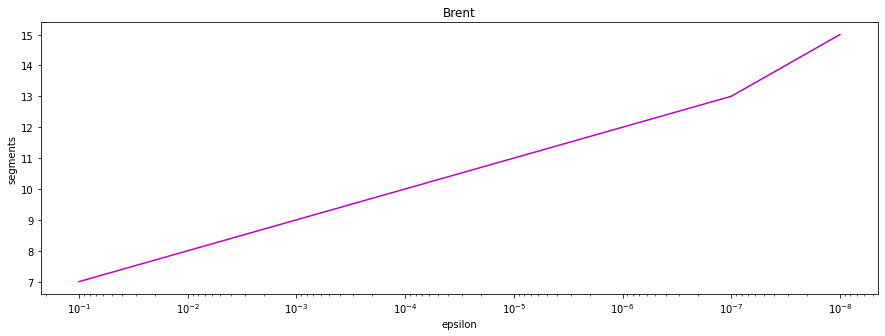

In [9]:
epsilons = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]

x1, c1, i1 = build_epsilon(dichotomy_algorithm.find_min, function, a, b, epsilons, "dichotomy")
x2, c2, i2 = build_epsilon(golden_ratio_algorithm.find_min, function, a, b, epsilons, "golden ratio")
x3, c3, i3 = build_epsilon(fibonacci_algorithm.find_min, function, a, b, epsilons, "fibonacci")
x4, c4, i4 = build_epsilon(parabola_algorithm.find_min, function, a, b, epsilons, "parabola")
x5, c5, i5 = build_epsilon(brent_algorithm.find_min, function, a, b, epsilons, "Brent")

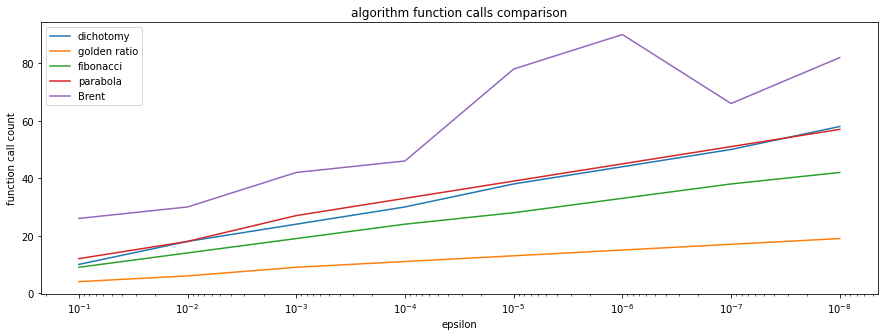

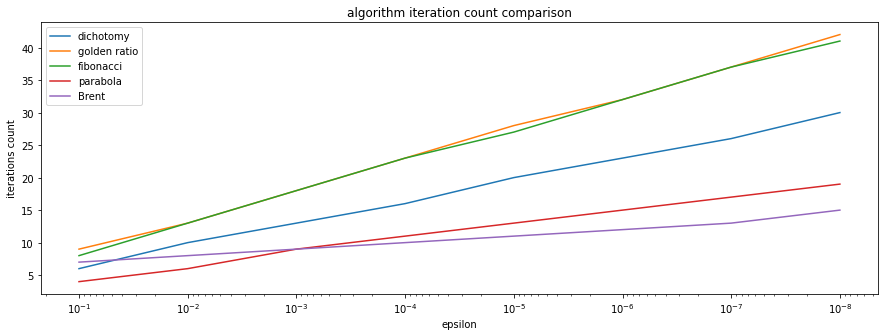

In [10]:
fig1 = plt.figure()
fig1.set_figheight(5)
fig1.set_figwidth(15)
ax1 = fig1.add_subplot(111)
ax1.plot(x1, c1, x2, c2, x3, c3, x4, c4, x5, c5)
plt.gca().invert_xaxis()
ax1.set_xlabel("epsilon")
ax1.set_ylabel("function call count")
ax1.set_title("algorithm function calls comparison")
ax1.set_xscale("log")
ax1.legend(["dichotomy", "golden ratio", "fibonacci", "parabola", "Brent"])

fig2 = plt.figure()
fig2.set_figheight(5)
fig2.set_figwidth(15)
ax2 = fig2.add_subplot(111)
ax2.plot(x1, i1, x2, i2, x3, i3, x4, i4, x5, i5)
plt.gca().invert_xaxis()
ax2.set_xlabel("epsilon")
ax2.set_ylabel("iterations count")
ax2.set_title("algorithm iteration count comparison")
ax2.set_xscale("log")
ax2.legend(["dichotomy", "golden ratio", "fibonacci", "parabola", "Brent"])

In [11]:
def build_table(algo, function, a, b, eps):
    cur = 0
    iter = []
    length = []
    ratio = []
    prev_len = b - a
    
    ans, calls, segments = algo(function, a, b, eps)
    
    for a, b in segments:
        iter.append(cur)
        length.append(b - a)
        ratio.append((b - a) / prev_len)
        prev_len = b - a
        cur += 1
        
    
    data = {"iteration": iter,
            "segment length": length,
            "segment ratio": ratio}
    
    df = pd.DataFrame(data)
    
    return df

In [12]:
eps = 1e-4

df = build_table(dichotomy_algorithm.find_min, function, a, b, eps)
df.style.set_caption("Dichotomy algorithm").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '16px')
    ]
}])

,iteration,segment length,segment ratio
0,0,3.000000,1.000000
1,1,1.500000,0.500000
2,2,0.750000,0.500000
3,3,0.375000,0.500000
4,4,0.187500,0.500000
5,5,0.093750,0.500000
6,6,0.046875,0.500000
7,7,0.023438,0.500000
8,8,0.011719,0.500000
9,9,0.005859,0.500000


In [13]:
df = build_table(golden_ratio_algorithm.find_min, function, a, b, eps)
df.style.set_caption("Golden ratio algorithm").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '16px')
    ]
}])

,iteration,segment length,segment ratio
0,0,3.000000,1.000000
1,1,1.854102,0.618034
2,2,1.145898,0.618034
3,3,0.708204,0.618034
4,4,0.437694,0.618034
5,5,0.270510,0.618034
6,6,0.167184,0.618034
7,7,0.103326,0.618034
8,8,0.063859,0.618034
9,9,0.039467,0.618034


In [14]:
df = build_table(fibonacci_algorithm.find_min, function, a, b, eps)
df.style.set_caption("Fibonacci algorithm").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '16px')
    ]
}])

,iteration,segment length,segment ratio
0,0,3.000000,1.000000
1,1,1.854102,0.618034
2,2,1.145898,0.618034
3,3,0.708204,0.618034
4,4,0.437694,0.618034
5,5,0.270510,0.618034
6,6,0.167184,0.618034
7,7,0.103326,0.618034
8,8,0.063859,0.618034
9,9,0.039467,0.618034


In [15]:
df = build_table(parabola_algorithm.find_min, function, a, b, eps)
df.style.set_caption("Parabola algorithm").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '16px')
    ]
}])

,iteration,segment length,segment ratio
0,0,3.000000,1.000000
1,1,0.395711,0.131904
2,2,0.230776,0.583194
3,3,0.063374,0.274614
4,4,0.029431,0.464394
5,5,0.008543,0.290278
6,6,0.003431,0.401602
7,7,0.001069,0.311574
8,8,0.000401,0.374668
9,9,0.000131,0.326111


In [16]:
df = build_table(brent_algorithm.find_min, function, a, b, eps)
df.style.set_caption("Brent algorithm").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '16px')
    ]
}])

4.5 5.072949016875158 6
5.072949016875158 5.134552702931446 6
5.134552702931446 5.209252383460868 6
5.134552702931446 5.324620905906675 5.324620905906675
5.209252383460868 5.231400217483067 5.324620905906675
5.231400217483067 5.23256047312403 5.324620905906675
5.23256047312403 5.232909702912138 5.324620905906675
5.232909702912138 5.232937528972387 5.246290187101917
5.232937528972387 5.232947528972387 5.232947528972387


,iteration,segment length,segment ratio
0,0,1.500000,0.500000
1,1,0.927051,0.618034
2,2,0.865447,0.933549
3,3,0.190068,0.219618
4,4,0.115369,0.606985
5,5,0.093221,0.808025
6,6,0.092060,0.987554
7,7,0.013380,0.145345
8,8,0.000010,0.000747
9,9,0.000010,1.000000
